# CAPSTONE PROJECT - ALY 6140 ANALYTICS SYSTEM TECHNOLOGY

## DATASET : BOSTON PROPERTY ASSESSMENT 2020(ANALYZE BOSTON)

### PART 1 :- DATA EXTRACTION 
###### THE DATASET PROPERTY ASSESSMENT BOSTON IS DIRECTLY AVAILABLE FOR DOWNLOAD FROM THE WEBSITE BELOW:- https://data.boston.gov/dataset/property-assessment . THE DATASET CONTAINS THE INFORMATION ABOUT THE VARIOUS PROPERTIES, PARCELS, OWNERSHIP TOGETHER WITH VALUABLE INFORMATION WHICH ENSURES FAIR ASSESSMENT OF BOSTON TAXABLE AND NON TAXABLE PROPERTY. THE DATASET COMES WITH THE PARCEL DATA KEY WHICH GIVES THE DESCRIPTION OF THE COLUMNS , FIELDS AND NAMES IN THE DATASET. THE DATASET CONTAINS ALMOST 174,668 ENTRIES WITH 75 ATTRIBUTES. HERE WE HAVE ONLY CONSIDERED FEW ATRRIBUTES BASED ON OUR PROPERTY ASSESSMENT AND ANALYSIS BASED ON THE TOTAL ASSESSED VALUE PROPERTIES.

##### ANALYSIS :- FOR THE ANALYSIS PURPOSE WE WILL BE PREDICTING THE TOTAL ASSESSED VALUE OF THE PROPERTY BASED ON OUR OBSERVANT VARIABLES SUCH AS PID,ZIPCODE,LU,AV_LAND,AV_TOTAL,GROSS_TAX	,LAND_S,YR_BUILT,YR_REMOD,GROSS_AREA	LIVING_AREA, NUM_FLOORS

###### BELOW IS THE DESCRIPTION FOR THE VARIABLES THAT WE HAVE CONSIDERED FOR THE ANALYSIS OF OUR DATASET:- 
PID	:-  Unique 10-digit parcel number. First 2 digits are the ward, digits 3 to 7 are the parcel, and digits 8 to 10 are the sub-parcel
 ZIPCODE:- Zip code of parcel         
 LU	      :- TYPE OF PROPERTY( LAND USE)
 AV_LAND  :- Total assessed land value           
 AV_TOTAL :-Total assessed value for property          
 GROSS_TAX	:- Tax bill amount based on total assessed value multiplied by the tax rate       
 LAND_SF	:- Parcel’s land area in square feet (legal area)             
 YR_BUILT	:- Year property was built                  
 YR_REMOD	:- Year property was last remodeled                    
 GROSS_AREA	:- Gross floor area for commercial properties                         
 LIVING_AREA:-	Living area square footage of the property                 
 NUM_FLOORS  :- # of levels in the structure located on the parcel
 
 QUESTIONS INTENDED TO ANSWER THE DATASET
 •	Every tax payer would like to know how property taxes are calculated. So he/she can estimate and plan for them.
•	Every real-estate company or an investor want to understand the market and factors that affects property prices before buying or selling a property.
•	I am analyzing “Property Assessment FY2020” dataset provided by “Analyze Boston”. I would be answering to below problem statement.
•	How are the assessed values of Land are influenced? What are the key factors used in calculating assessed values of the land or property in Boston?


In [2]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import display

#### DATASET CAN BE LOADED DIRECTLY FROM THE PUBLICALLY AVAILABEL WEBSITE 

In [3]:
BostonPropertydf = pd.read_csv('https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/8de4e3a0-c1d2-47cb-8202-98b9cbe3bd04/download/data2020-full.txt')

# DATA EXTRACTION

In [4]:
#TO view the first 5 colums and rows of the dataset
BostonPropertydf.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,100271002,100271000.0,100271000,356,PRINCETON,ST,1,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
1,100271004,100271000.0,100271000,356,PRINCETON,ST,2,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
2,100271006,100271000.0,100271000,356,PRINCETON,ST,3,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
3,100272000,NaN,100272000,352,PRINCETON,ST,NaN,2128.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100273000,NaN,100273000,,PRINCETON,ST,NaN,2128.0,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Getting the shape of the dataset 
BostonPropertydf.shape

(175052, 75)

In [6]:
#To View the DATATYPE OF THE DATASET
BostonPropertydf.dtypes

PID            int64
CM_ID        float64
GIS_ID         int64
ST_NUM        object
ST_NAME       object
              ...   
U_AC          object
U_FPLACE     float64
U_INT_FIN     object
U_INT_CND     object
U_VIEW        object
Length: 75, dtype: object

In [7]:
#Extracting the columns of the dataset
BostonPropertydf.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF',
       'UNIT_NUM', 'ZIPCODE', 'PTYPE', 'LU', 'OWN_OCC', 'OWNER',
       'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'AV_LAND',
       'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'STRUCTURE_CLASS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_BTH_STYLE2',
       'R_BTH_STYLE3', 'R_KITCH', 'R_KITCH_STYLE', 'R_KITCH_STYLE2',
       'R_KITCH_STYLE3', 'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND',
       'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'S_NUM_BLDG',
       'S_BLDG_STYL', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN',
       'S_EXT_CND', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_CORNER', 'U_ORIENT',
       'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_BTH_STYLE',
       'U_BTH_STYLE2', 'U_BTH_STYLE3', 'U_KITCH_TYPE', 'U_KIT

In [8]:
# CAlCULATING THE STATISTICS FOR THE AVERAGE TOTAL ASSESSED VALUE OF THE PROPERTY
#STORING THE RESULTS OF AVERAGE TOTAL IN THE PRICE 
prices = BostonPropertydf['AV_TOTAL']


# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $0
Maximum price: $1857864600
Mean price: $1284305.6051630373
Median price $511700.0
Standard deviation of prices: $11944298.387052072


In [9]:
#Calculating the skewness and Kurtosis for the dataset 
print("Skewness: %f" % BostonPropertydf['AV_TOTAL'].skew())
print("Kurtosis: %f" % BostonPropertydf['AV_TOTAL'].kurt())

Skewness: 52.480127
Kurtosis: 4886.874789


## DATA CLEANUP

The purpose of this EDA is to find insights which will serve us later in another notebook for Data cleaning/preparation/transformation which will ultimately be used into a machine learning algorithm. We will proceed as follow:

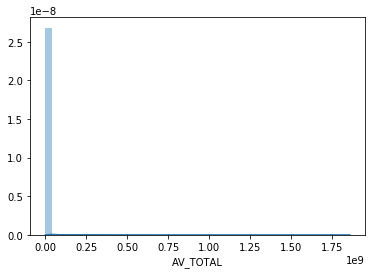

In [10]:
##histogram to see distribution of "Average Total for Assessed Property "
sns.distplot(BostonPropertydf['AV_TOTAL']);

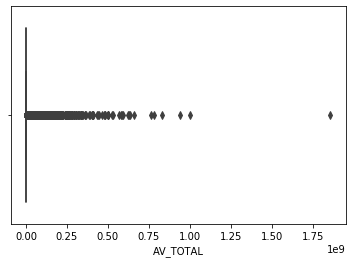

In [11]:

#BOXPLOT for the distribution of 'Average Total for assessed property value'
sns.boxplot(BostonPropertydf['AV_TOTAL'])

DATA CLEANING

Select useful columns

In [12]:
#Cleaning the data using only some of the required columns for analysis 
BostonProperty = BostonPropertydf[['PID', 'ZIPCODE', 'LU', 'AV_LAND', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
                                  'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS']]

In [13]:
#Getting the first 5 rows for the data 
BostonProperty.head(5)

,PID,ZIPCODE,LU,AV_LAND,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS
0,100271002,2128.0,CD,0,364700,3851.23,0,1900.0,2018.0,791.0,791.0,1.0
1,100271004,2128.0,CD,0,373400,3943.10,0,1900.0,2018.0,799.0,799.0,1.0
2,100271006,2128.0,CD,0,394400,4164.86,0,1900.0,2018.0,908.0,908.0,1.0
3,100272000,2128.0,R3,349800,705700,7452.19,5000,1900.0,NaN,3632.0,2404.0,2.5
4,100273000,2128.0,RL,38400,38400,405.50,1900,NaN,NaN,NaN,NaN,NaN


In [14]:
# Getting the shape of the data 
BostonProperty.shape

(175052, 12)

In [15]:
#Getting names of the columns
BostonProperty.columns

Index(['PID', 'ZIPCODE', 'LU', 'AV_LAND', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'YR_REMOD', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS'],
      dtype='object')

In [16]:
#Checkingt the data types of the columns 
BostonProperty.dtypes

PID              int64
ZIPCODE        float64
LU              object
AV_LAND          int64
AV_TOTAL         int64
GROSS_TAX      float64
LAND_SF          int64
YR_BUILT       float64
YR_REMOD       float64
GROSS_AREA     float64
LIVING_AREA    float64
NUM_FLOORS     float64
dtype: object

FINDING OUTLIERS IN THE DATA 

Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is referred to as skewed. Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center)

In [17]:
# FINDING THE OUTLIERS
q_low = BostonProperty["AV_TOTAL"].quantile(0.01)
q_hi  = BostonProperty["AV_TOTAL"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty[(BostonProperty["AV_TOTAL"] < q_hi) & (BostonProperty["AV_TOTAL"] > q_low)]

In [18]:
#PRINTING THE RESULTS OF OUTLIERS FOR AVERAGE TOTAL ASSESSED PROPERTY VALUE 
print("Skewness: %f" % BostonProperty_wo_outliers['AV_TOTAL'].skew())
print("Kurtosis: %f" % BostonProperty_wo_outliers['AV_TOTAL'].kurt())

Skewness: 4.805776
Kurtosis: 31.246091


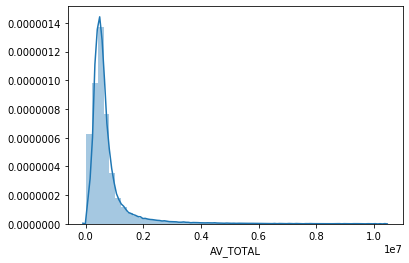

In [19]:

# Distribution PLOT FOR THE AVERAGE TOTAL ASSESSED PROPERTY VALUE 
sns.distplot(BostonProperty_wo_outliers['AV_TOTAL']);

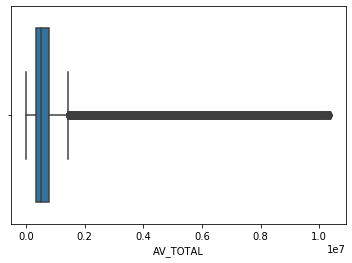

In [20]:
#BOXPLOT FOR THE AVERAGE TOTAL ASSESSED PROPERTY VALUE 
sns.boxplot(BostonProperty_wo_outliers['AV_TOTAL'])

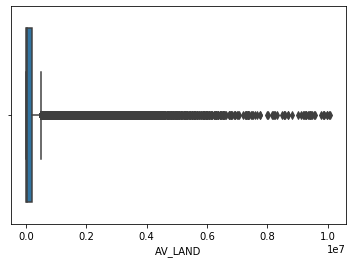

In [21]:
##BOXPLOT FOR THE AVERAGE LAND VALUE 
sns.boxplot(BostonProperty_wo_outliers['AV_LAND'])

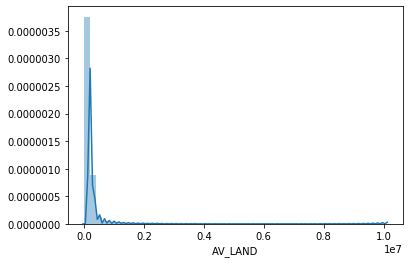

In [22]:
#Distribution plot  FOR THE AVERAGE LAND VALUE 
sns.distplot(BostonProperty_wo_outliers['AV_LAND']);

In [23]:
#FINDING TEH OUTLIERS FOR THE AVERAGE LAND VALUE
q_low = BostonProperty_wo_outliers["AV_LAND"].quantile(0.01)
q_hi  = BostonProperty_wo_outliers["AV_LAND"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty_wo_outliers[(BostonProperty["AV_LAND"] < q_hi) & (BostonProperty_wo_outliers["AV_LAND"] > q_low)]

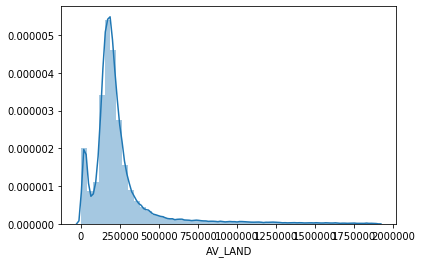

In [24]:
#Distribution PLOt FOR THE OUTLIERS IN TEH DATA FOR AVERAGE LAND VALUE 
sns.distplot(BostonProperty_wo_outliers['AV_LAND']);

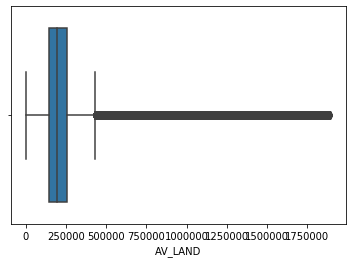

In [25]:
#BOX PLOT FOR AVERAGE LAND VALUE 
sns.boxplot(BostonProperty_wo_outliers['AV_LAND'])

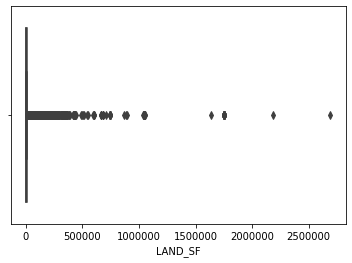

In [26]:
# BOXPLOT FOR 'Parcel’s land area in square feet (legal area)               
sns.boxplot(BostonProperty_wo_outliers['LAND_SF'])

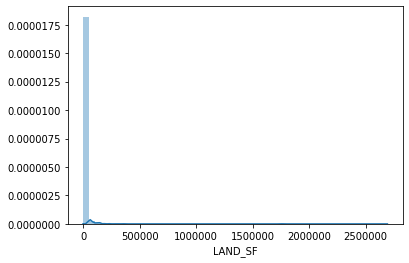

In [27]:
#Distribution plot for  'Parcel’s land area in square feet (legal area)   
sns.distplot(BostonProperty_wo_outliers['LAND_SF'])

In [28]:
#Finding the outliers for the 'Parcel’s land area in square feet (legal area) 
q_low = BostonProperty_wo_outliers["LAND_SF"].quantile(0.01)
q_hi  = BostonProperty_wo_outliers["LAND_SF"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty_wo_outliers[(BostonProperty["LAND_SF"] < q_hi) & (BostonProperty_wo_outliers["LAND_SF"] > q_low)]

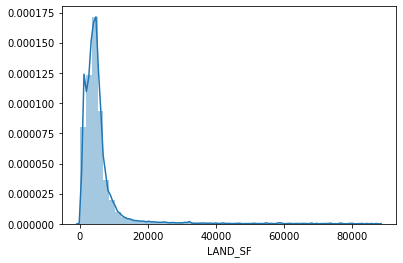

In [29]:
#Distribution plot for  'Parcel’s land area in square feet (legal area) 
sns.distplot(BostonProperty_wo_outliers['LAND_SF'])

In [30]:
#Finding the outliers for the 'Gross_area' 
q_low = BostonProperty_wo_outliers["GROSS_AREA"].quantile(0.01)
q_hi  = BostonProperty_wo_outliers["GROSS_AREA"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty_wo_outliers[(BostonProperty["GROSS_AREA"] < q_hi) & (BostonProperty_wo_outliers["GROSS_AREA"] > q_low)]

In [31]:
#Finding the outliers for the 'Living Area' 
q_low = BostonProperty_wo_outliers["LIVING_AREA"].quantile(0.01)
q_hi  = BostonProperty_wo_outliers["LIVING_AREA"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty_wo_outliers[(BostonProperty["LIVING_AREA"] < q_hi) & (BostonProperty_wo_outliers["LIVING_AREA"] > q_low)]

In [32]:
##Finding the outliers for the 'Gross_Tax' 
q_low = BostonProperty_wo_outliers["GROSS_TAX"].quantile(0.01)
q_hi  = BostonProperty_wo_outliers["GROSS_TAX"].quantile(0.99)

BostonProperty_wo_outliers = BostonProperty_wo_outliers[(BostonProperty["GROSS_TAX"] < q_hi) & (BostonProperty_wo_outliers["GROSS_TAX"] > q_low)]

In [33]:
# Calculating the number of outliers in the data with their percentage
total = BostonProperty_wo_outliers.isnull().sum().sort_values(ascending=False)
percent = (BostonProperty_wo_outliers.isnull().sum()/BostonProperty_wo_outliers.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
YR_REMOD,37116,0.554094
YR_BUILT,13,0.000194
NUM_FLOORS,7,0.000105
LIVING_AREA,0,0.000000
GROSS_AREA,0,0.000000
LAND_SF,0,0.000000
GROSS_TAX,0,0.000000
AV_TOTAL,0,0.000000
AV_LAND,0,0.000000
LU,0,0.000000


In [34]:
# Dropping the column "YR_REMOD" from the data as contains too many missing values 
BostonProperty_wo_outliers = BostonProperty_wo_outliers.drop('YR_REMOD', 1)

In [35]:
#Checking if the column "YR_REMOD" has been removed from the data 
BostonProperty_wo_outliers.head()

,PID,ZIPCODE,LU,AV_LAND,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,GROSS_AREA,LIVING_AREA,NUM_FLOORS
3,100272000,2128.0,R3,349800,705700,7452.19,5000,1900.0,3632.0,2404.0,2.5
7,100275000,2128.0,R3,203200,597900,6313.82,1250,1930.0,3872.0,2904.0,3.0
8,100276000,2128.0,R3,202700,590600,6236.73,1250,1890.0,3520.0,2244.0,3.0
9,100277000,2128.0,R3,202400,586300,6191.33,1250,1890.0,3564.0,2376.0,3.0
10,100278000,2128.0,R3,200900,544900,5754.14,1250,1890.0,3388.0,2244.0,3.0


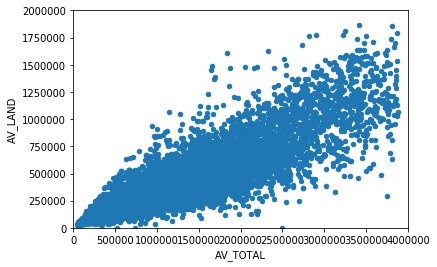

In [36]:
#scatter plot AvgTOTAL/AVG_LAND
var = 'AV_LAND'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
data.plot.scatter(y=var, x='AV_TOTAL', xlim=(0,4000000), ylim=(0,2000000));

## RESULTS FOR DATA CLEANING:- 
AS we can see for the data set we had to much cleaning by first finding the outliers for each variable in our dataset that we considered for our analysis and model building. 
We found that most of the variables in our dataset were left skewed (negatively skewed) thus having outliers in the data. So first step was to remove the outliers in the data by using skewness and kurtosis
Thus we used the statistical methods to perform the data smoothing(removing the outliers in the data) by finding the INTER QUARTILE RANGE(IQR) for them. ( IQR= Q3- Q1)
Then we plotted the distribution for all the variables and box plot to check if the outliers were removed. A
After performing the data smoothing step we calculated the number of outliers still present in our variables and calculated their percentage as well. We found that two variables still have high amount of missing values such as 'YR_REMOD' and 'YR_BUILD'.
Thus we dropped the column 'YR_REMOD' as it was no longer useful to us in our analysis being the highest number of missing values. 

## DATA VISUALIZATION 

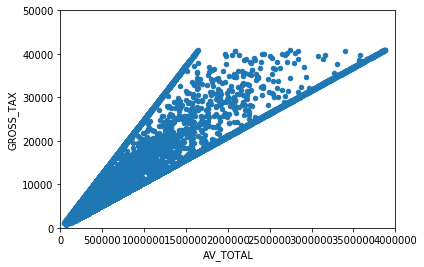

In [37]:
#scatter plot GROSS TAX/AV_TOTAL
var = 'GROSS_TAX'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
data.plot.scatter(y=var, x='AV_TOTAL', xlim=(0,4000000), ylim=(0,50000));

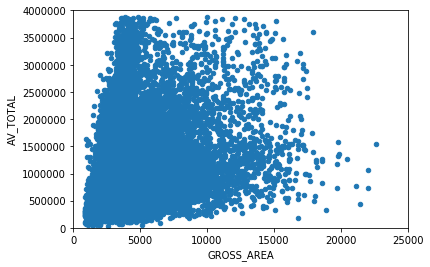

In [38]:
#scatter plot GROSS_AREA/AV_TOTAL
var = 'GROSS_AREA'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
data.plot.scatter(x=var, y='AV_TOTAL', xlim=(0,25000), ylim=(0,4000000));

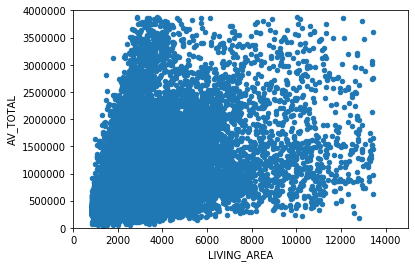

In [39]:
#scatter plot  Living area/AV_TOTAL
var = 'LIVING_AREA'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
data.plot.scatter(x=var, y='AV_TOTAL', xlim=(0,15000), ylim=(0,4000000));

## RESULTS OF VISUALIZATIONS 
FROM OUR ANALYSIS WE  TRIED TO PLOT THE SCATTERPLOTS WHICH BASICALLY SHOWS THE CORRELATION AMONGST THE VARIABLES IN THE DATASET. THE SCATTERPLOTS DEPICTS THE CORRELATION IF THE ATTRIBUTES IN OUR DATASET ARE CORRELATED TO EACH AND WHETHER THEY ARE CORRELATED NEGATIVELY OR POSITIVELY. 
AS WE CAN MOST OUR VARIABLES DID A PRETTY GOOD JOB OF HAVING POSITIVE CORRELATION WITH OUR TARGET VARIABLE "AV_TOTAL". WE CAN SEE THE NUMBER OF FLOOR WAS NEGATIVELY CORREALTED, THUS IT CAN BE REMOVED FROM OUR DATASET WHILE TRAINING THE MODEL.
THE RESULTS ABOVE IMPLIES THAT WHICH VARIABLES SHALL BE CONSIDERED FOR OUR MODELLING PURPOSES. SO FROM THIS VISUALIZATION WE CONLUDED THAT THE  AV_LAND','GROSS_TAX', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA HAVE POSITIVE CORRELATION THUS CAN BE CONSIDERED FOR OUR LINEAR MODEL. 


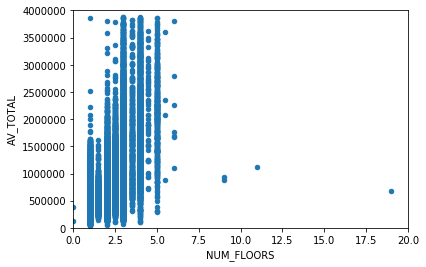

In [90]:
#scatter plot NUM_FLOORS/AV_TOTAL 
var = 'NUM_FLOORS'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
data.plot.scatter(x=var, y='AV_TOTAL', xlim=(0,20), ylim=(0,4000000));

## DESCRIPTIVE ANALYTICS 

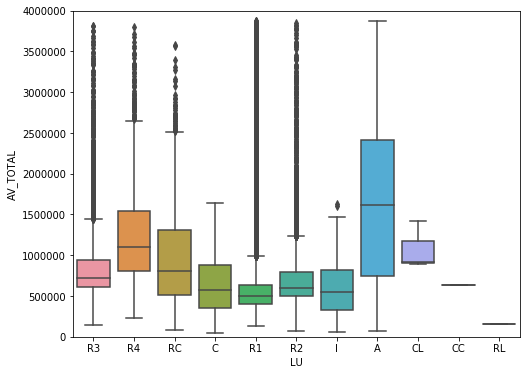

In [41]:
#BOX PLOT FOR THE LAND UNIT  VS AV_TOTAL 
var = 'LU'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="AV_TOTAL", data=data)
fig.axis(ymin=0, ymax=4000000);

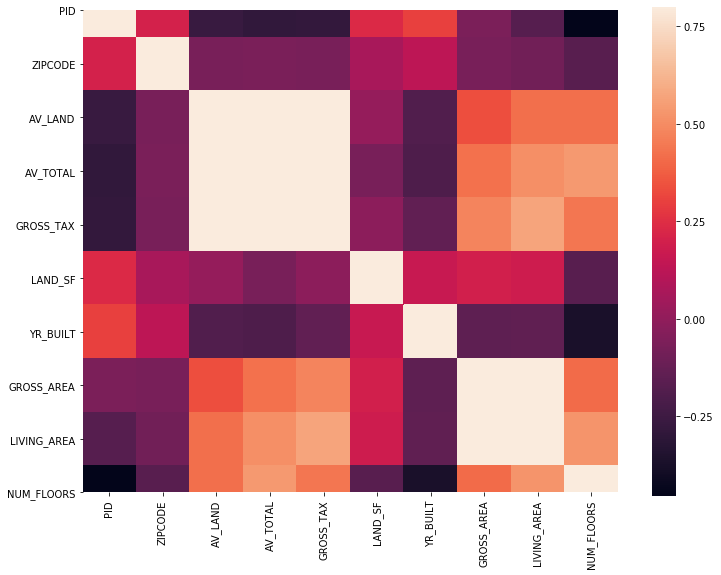

In [42]:
#correlation matrix
corrmat = BostonProperty_wo_outliers.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

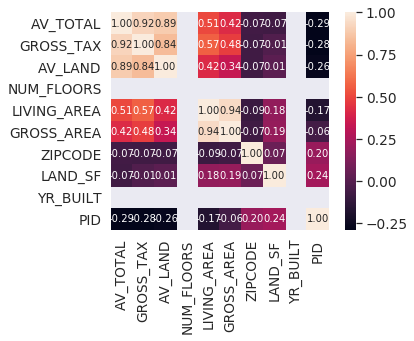

In [89]:
#correlation matrix with their coefficients and values 
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'AV_TOTAL')['AV_TOTAL'].index
cm = np.corrcoef(BostonProperty_wo_outliers[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

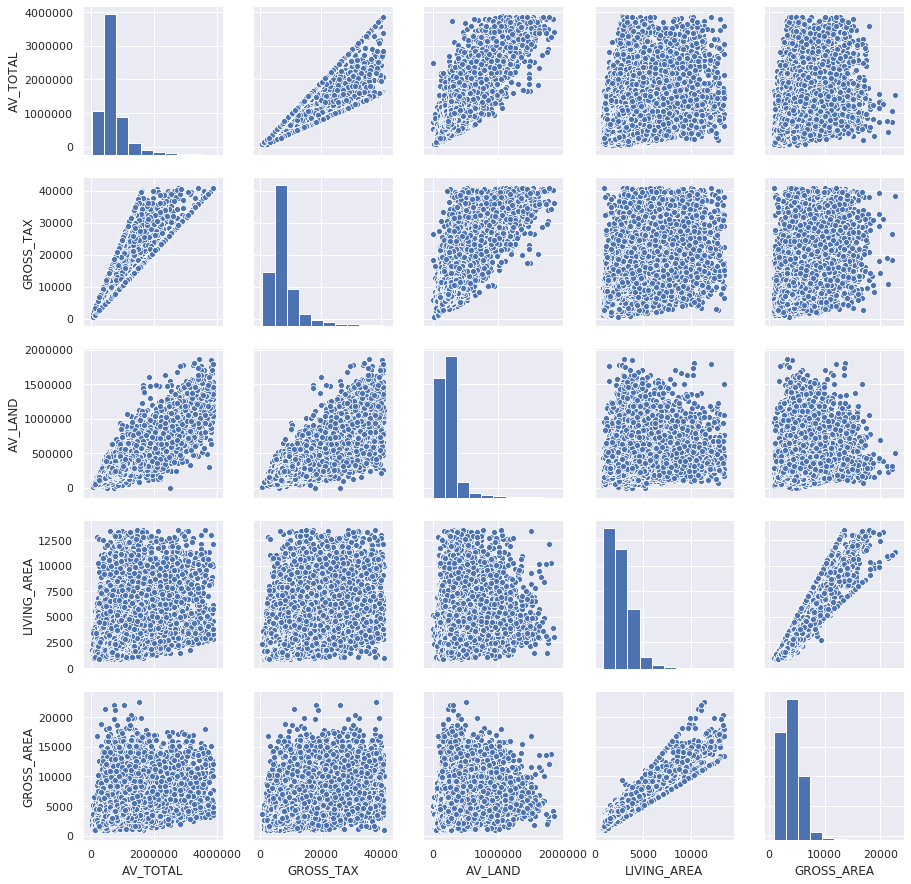

In [91]:
#scatterplot depicting the correlation with our predictor variable 
sns.set()
cols = ['AV_TOTAL', 'GROSS_TAX', 'AV_LAND', 'LIVING_AREA','GROSS_AREA']
sns.pairplot(BostonProperty_wo_outliers[cols], size = 2.5)
plt.show();

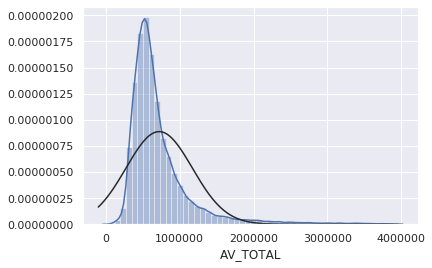

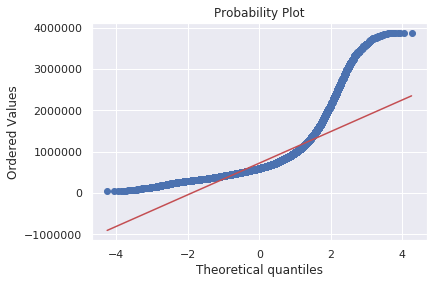

In [92]:
#histogram and normal probability plot
sns.distplot(BostonProperty_wo_outliers['AV_TOTAL'], fit=norm);
fig = plt.figure()
res = stats.probplot(BostonProperty_wo_outliers['AV_TOTAL'], plot=plt)

In [93]:
BostonProperty_wo_outliers['AV_TOTAL'] = np.log(BostonProperty_wo_outliers['AV_TOTAL'])

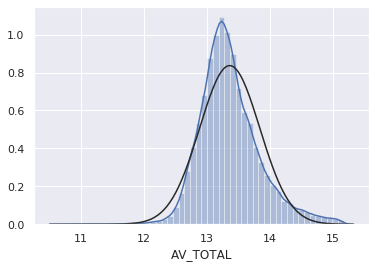

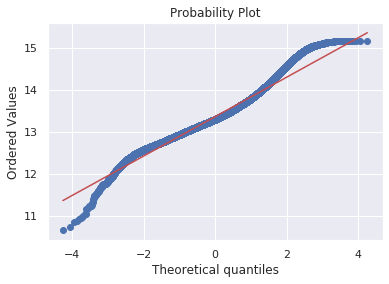

In [94]:
#transformed histogram and normal probability plot
sns.distplot(BostonProperty_wo_outliers['AV_TOTAL'], fit=norm);
fig = plt.figure()
res = stats.probplot(BostonProperty_wo_outliers['AV_TOTAL'], plot=plt)

In [95]:
#https://www.unitedstateszipcodes.org
#Getting zipcodes for Neighbourhood
zipcodebyname = pd.read_csv('NamesByZipCode.csv')

In [96]:
zipcodebyname.head(5)

,ZIPCODE,Name
0,2127.0,South Boston
1,2130.0,Jamaica Plain
2,2135.0,Brighton
3,2132.0,West Roxbury
4,2124.0,Dorchester Center


In [97]:
#Merged the zipcode with the our dataset 
BostonProperty_wo_outliers = pd.merge(BostonProperty_wo_outliers, zipcodebyname, left_on='ZIPCODE', right_on='ZIPCODE', how='left', validate='m:m')

In [98]:
# Getting the first 5 rows of the merged dataset 
BostonProperty_wo_outliers.head(5)

,PID,ZIPCODE,LU,AV_LAND,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,GROSS_AREA,LIVING_AREA,NUM_FLOORS,Name
0,100272000,2128.0,R3,349800,13.466945,7452.19,5000,1900.0,3632.0,2404.0,2.5,East Boston
1,100275000,2128.0,R3,203200,13.301179,6313.82,1250,1930.0,3872.0,2904.0,3.0,East Boston
2,100276000,2128.0,R3,202700,13.288894,6236.73,1250,1890.0,3520.0,2244.0,3.0,East Boston
3,100277000,2128.0,R3,202400,13.281587,6191.33,1250,1890.0,3564.0,2376.0,3.0,East Boston
4,100278000,2128.0,R3,200900,13.208358,5754.14,1250,1890.0,3388.0,2244.0,3.0,East Boston


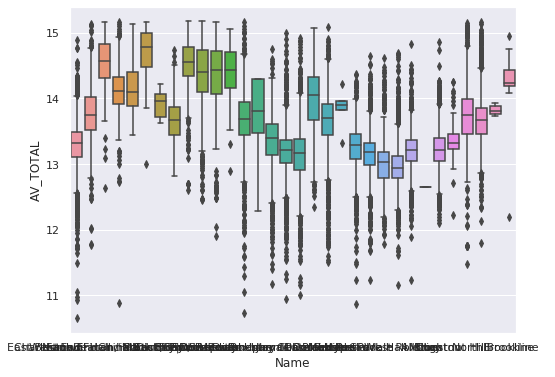

In [107]:
# BOXplot for the name of the areas (zipcode wise with) with their AV_TOTAL
var = 'Name'
data = pd.concat([BostonProperty_wo_outliers['AV_TOTAL'], BostonProperty_wo_outliers[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="AV_TOTAL", data=data)
#fig.axis(ymin=0, ymax=10);

## RESULTS OF DESCRIPTIVE ANALYTICS 
* THE first boxplot shows us the Land Value w.r.t to the AV_TOTAL. As we can see that for LAND UNITS most of the space is covered by the "A" Residential Family Units ( 7 or more familes) , followed by R4= Residential 4 or more family.
* We can clearly identify some relationships. Most of them seems to have a linear relationship with the 'AVG_TOTAL'and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the data.
* We also plotted the heatmap or correlation map for our observed and target variables to depict the linear relationship amongst them. The heatmap explains the correlations amongst the variables 
* Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
* A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/dark orange because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
* GROSS_TAX, AVG_LAND ARE highly correlated.

NOTE:- HAVE MADE FEW EXTRA GRAPHS 

### PREPARING THE DATA FOR OUR MODELLING 

## PREDICTIVE ANALYTICS 

In [44]:
BostonProperty_wo_outliers.columns

Index(['PID', 'ZIPCODE', 'LU', 'AV_LAND', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF',
       'YR_BUILT', 'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS'],
      dtype='object')

In [65]:
# Create a list of independent variables and select the target variable. Here, the target variable is total consumption
X = BostonProperty_wo_outliers[['AV_LAND','GROSS_TAX', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA']]
y = BostonProperty_wo_outliers[['AV_TOTAL']]

In [86]:
# Run Least ordinary Least Squares Method to estimate parameters of linear regression model
import statsmodels.api as sm
X= sm.add_constant(X)
model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AV_TOTAL   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.234e+05
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:51:41   Log-Likelihood:            -8.8915e+05
No. Observations:               66985   AIC:                         1.778e+06
Df Residuals:                   66979   BIC:                         1.778e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.266e+04   1542.209     40.632      0.000    5.96e+04    6.57e+04
AV_LAND         1.2028      0.007    178.815      0.000       1.190       1.216
GROSS_TAX      47.2006      0.211    223.452      0.000      46.787      47.615
LAND_SF        -6.5256      0.108    -60.299      0.000      -6.738      -6.313
GROSS_AREA      4.6052      0.878      5.247      0.000       2.885       6.325
LIVING_AREA     3.3568      1.207      2.781      0.005       0.991       5.723
==============================================================================
Omnibus:                    34546.185   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1027398.857
Skew:                          -1.907   Prob(JB):                         0.00
Kurtosis:                      21.803   Cond. No.                     7.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Create training and testing set from the data, test data is 25% and train data is 75% of the total data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.25, random_state=0)

In [67]:
# Importing the linear regression functgion
from sklearn.linear_model import LinearRegression

In [68]:
# Now, Create object of Linear Regression and then fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# Predict the test set result
y_pred = regressor.predict(X_test).round(2)

In [70]:
from sklearn.metrics import r2_score
from sklearn import metrics

In [89]:
#Finding the value for R square 
r2_score(y_test,y_pred)

0.9024605385287988

In [72]:
# Mean Absolute Error
mae = metrics.mean_absolute_error(y_test,y_pred)
mae

74880.00456559384

In [73]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test,y_pred)
mse

19565053508.268074

In [74]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
rmse

139875.13541822962

In [75]:
# Importing important functions to perform Lasso Regression
from sklearn.linear_model import Lasso
from pandas import Series, DataFrame
from sklearn.linear_model import LassoCV



In [76]:
# Lasso Regression for regularization
las = Lasso(random_state=0)
las.fit(X_train, y_train)



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
#Findingthe adjusted r square 
las.score(X_train, y_train)

0.901900326043388

In [78]:
# Predicting the results on the test set
pred_2=las.predict(X_test)
pred_2

array([ 783956.14408029,  459553.66402522,  410194.07426023, ...,
       1454394.54770601,  577399.27902541,  511477.04731889])

In [79]:
# GEtting the adjusted r square 
las.score(X_test, y_test)

0.902460538498369

In [80]:
# Finding the mean squared error for lasso 
mse_2 = metrics.mean_squared_error(y_test,pred_2)
mse_2

19565053514.371857

In [81]:
#Finding the Root Mean Squared Error for the Lasso 
rmse_2 = np.sqrt(mse_2)
rmse_2

139875.1354400483

In [82]:
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(las.coef_)
print(coeff)

print('\n\nModel performance on Train data = ')
print(las.score(X_train,y_train))

print('\n\nModel performance on Test data = ')
print(las.score(X_test,y_test))

             0  Coefficient Estimate
0      AV_LAND              1.196439
1    GROSS_TAX             47.610136
2      LAND_SF             -6.561919
3   GROSS_AREA              4.185349
4  LIVING_AREA              3.375286


Model performance on Train data = 
0.901900326043388


Model performance on Test data = 
0.902460538498369


In [84]:
residual = y_test["AV_TOTAL"].values-pred_2

Text(0, 0.5, 'Predicted Values')

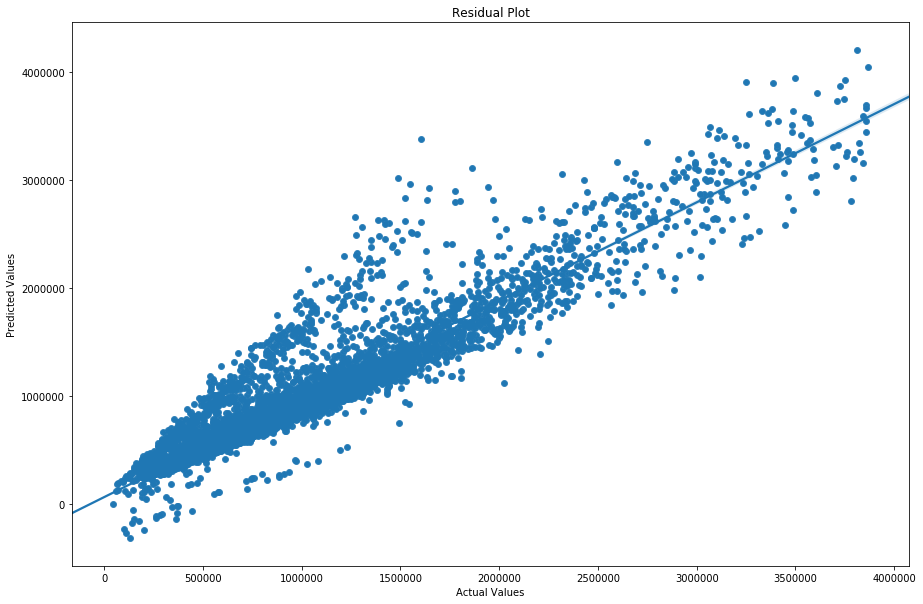

In [85]:
# Plot residuals
xval= y_test["AV_TOTAL"].values
yval = pred_2
plt.figure(figsize=(15,10))
sns.scatterplot(x= xval, y=yval)
sns.regplot(x= xval, y=yval)
plt.title("Residual Plot")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

## RESULTS OF OUR ANALYSIS:- 
* We used the AV_TOTAL AS our target variable where as the other variables in the data set such as LAND_UNITS, were used as the observed variables 
* We divided the dataset in two parts that is training and testing dataset. For training data we took 75% of the data, while for making the predictions on the test dataset we took remaining 25% of the data. 
* For our model we used both the techniques of regression that is 1)Multivariate Linear Regression and 2) LASSO Regression. We also used the ORDINARY LEAST SQUARES TO PREDICT THE RESULTS
*As said earlier, in case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes. 
* We Predicted the results of our dataset both on the training and testing dataset.
* We Calculated the R square, RMSE, MAE, MSE for the our Linear and Lasso Regression. 
* We predicted the results of our model on the training and  test data and got the results as 
Model performance onf the Training data= 0.901900326043388


Model performance on Test data = 
0.902460538498369



             0  Coefficient Estimate
0      AV_LAND              1.196439
1    GROSS_TAX             47.610136
2      LAND_SF             -6.561919
3   GROSS_AREA              4.185349
4  LIVING_AREA              3.375286

* From the above results we can see that the  GROSS_ TAX has more effect on the the Average Total Assessed Property Value, followed by the GROSS_AREA.

* As we can see that our model gave a pretty much high accuracy an
* We got the same results of our prediction to be around 90% for the Multivariate Linear Regression Model as well. 

# Note that for rmse, the lower that value is, the better the fit
139875.13541822962
# The closer towards 1, the better the fit
139875.1354400483

* WE got pretty much same results for both the models. Meaning our models is accurate 


## CONCLUSION

*Multivariate/multiple linear regression is one an extremely useful algorithm for tracking the relationships of continuous variables.
